In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import skimage.io

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
winners = [7193229, 7215993, 7199273, "cellprofiler"]
THRESHOLD = 0.5

# Load submission results

In [4]:
data_dir = "/storage/data/DSB2018/"

submissions = pd.read_csv(data_dir + "metadata/submissions.csv")

image_groups = pd.read_csv(data_dir + "metadata/image_groups_defined_by_beth.csv")
image_groups.loc[image_groups.Group == "PinkAndPurple", "Group"] = "RinkAndPurple"

accuracy = pd.read_csv(data_dir + "results/accuracy.csv")

false_negatives = pd.read_csv(data_dir + "results/false_negatives.csv")

splits_merges = pd.read_csv(data_dir + "results/splits_merges.csv")

In [5]:
average_f1 = accuracy.groupby("SubmissionID").mean().reset_index()

average_f1 = pd.merge(submissions, average_f1, left_on="id", right_on="SubmissionID")

print("Submissions with parsing problems:", len(average_f1[average_f1["F1"] == 0].SubmissionID))

average_f1 = average_f1[average_f1["F1"] > 0]

Submissions with parsing problems: 24


# Load CellProfiler results

In [6]:
cp_accuracy = pd.read_csv(data_dir + "results/cp_accuracy.csv")

cp_false_negatives = pd.read_csv(data_dir + "results/cp_false_negatives.csv")

cp_splits_merges = pd.read_csv(data_dir + "results/cp_splits_merges.csv")

# Compare official score to F1

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


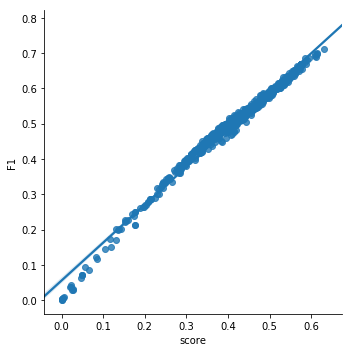

In [7]:
sb.lmplot(data=average_f1, x="score", y="F1", fit_reg=True)

# Distribution of F1 and scores

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


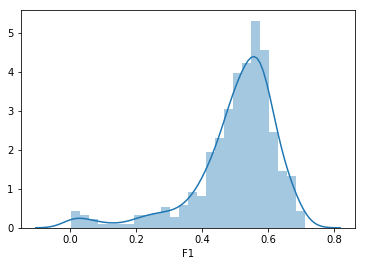

In [8]:
sb.distplot(average_f1["F1"])

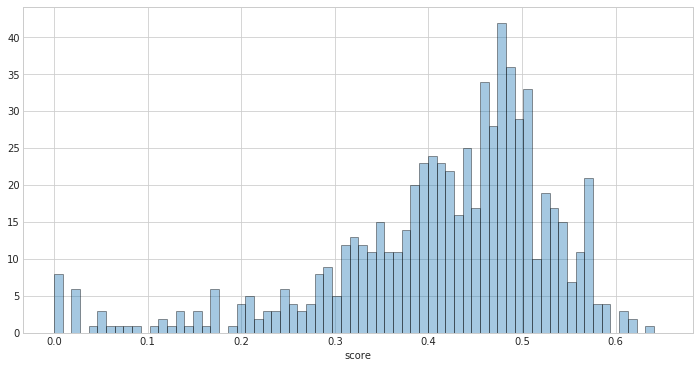

In [9]:
plt.figure(figsize=(12,6))
sb.set_style("whitegrid")

#sb.set_style("darkgrid", {"axes.facecolor": ".9"})
sb.distplot(
    average_f1["score"], 
    bins=70, 
    kde=False,
    hist_kws={"range": [0.0,0.65], "edgecolor":"k", "linewidth":1, "rwidth":1.0},
    kde_kws={"color": "k", "lw": 0.5}
)

# Change in ranking

In [10]:
r = 0
average_f1["F1_ranking"] = 0
for k in average_f1.sort_values(by="F1", ascending=False).itertuples():
    average_f1.loc[k.Index, "F1_ranking"] = r
    r += 1
    
r = 0
average_f1["score_ranking"] = 0
for k in average_f1.sort_values(by="score", ascending=False).itertuples():
    average_f1.loc[k.Index, "score_ranking"] = r
    r += 1
    
average_f1["Dropped"] = average_f1["F1_ranking"] > average_f1["score_ranking"]

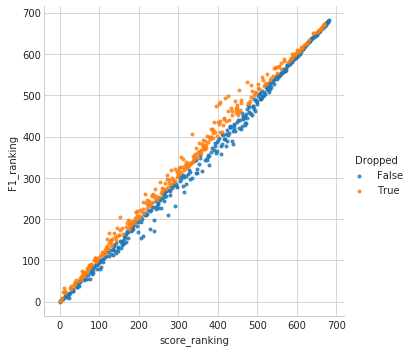

In [11]:
sb.lmplot(data=average_f1, x="score_ranking", y="F1_ranking", fit_reg=False, markers=".", hue="Dropped")

# CellProfiler metrics

In [12]:
cp_accuracy.mean() #.groupby(["Threshold"]).mean()

Threshold          0.725000
F1                 0.628041
Jaccard            0.740860
TP                17.055660
FP                17.623585
FN                18.010377
Official_Score     0.528076
dtype: float64

In [13]:
average_f1[average_f1["score"] > 0.528].sort_values(by=["score_ranking"], ascending=True)

,filename,id,score,team,SubmissionID,F1,FN,FP,Jaccard,Official_Score,Oficial_Score,TP,Threshold,F1_ranking,score_ranking,Dropped
0,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,7193229,0.711952,12.201887,9.456604,0.822865,0.631433,NaN,22.864151,0.725,0,0,False
2,sub-scale3.csv,7215993,0.614730,jacobkie,7215993,0.698661,15.330189,9.783019,0.831992,0.614532,NaN,19.735849,0.725,2,1,True
1,stage2_sub_003b_20180409T01434.csv,7199273,0.614046,Deep Retina,7199273,0.700783,15.498113,8.120755,0.804857,0.613829,NaN,19.567925,0.725,1,2,False
3,sub_2.csv,7202106,0.610883,Nuclear Vision,7202106,0.689498,12.556604,8.009434,0.787119,0.610668,NaN,22.509434,0.725,5,3,True
4,stage2_submission.csv,7198739,0.609295,Inom Mirzaev,7198739,0.698194,15.391509,8.438679,0.811465,0.609081,NaN,19.674528,0.725,3,4,False
6,1_aug_gray_1_5_1_stage_2_v1__23999_thresh_15_0...,7199730,0.608128,Gangadhar Payyavula,7199730,0.691133,15.887736,10.821698,0.810386,0.607955,NaN,19.178302,0.725,4,5,False
5,sub_stage2.csv,7211410,0.594075,ACS,7211410,0.685757,14.508491,12.357547,0.817278,0.593829,NaN,20.557547,0.725,6,6,False
7,final-0.6.csv,7194952,0.590253,ZhengLi,7194952,0.679453,16.264151,9.849057,0.803629,0.590002,NaN,18.801887,0.725,8,7,True
8,submission_v1.csv,7206692,0.588339,Yuanfang Guan and Wei Dong,7206692,0.668596,17.453774,10.783962,0.813639,0.588104,NaN,17.612264,0.725,23,8,True
25,stage2_init.csv,7185524,0.585559,Two Masketeers,7185524,0.684773,14.745283,9.141509,0.769040,0.585322,NaN,20.320755,0.725,7,9,False


# Average accuracy by image type

In [14]:
imgrp_results = pd.merge(accuracy, image_groups, on="Image")
f1_x_group = imgrp_results[ imgrp_results["Threshold"].round(decimals=2) == THRESHOLD ].groupby(["SubmissionID", "Group"]).mean()[["F1"]].reset_index()
palette=["xkcd:gray", "xkcd:violet", "violet", "xkcd:azure", "xkcd:green", "xkcd:black"]

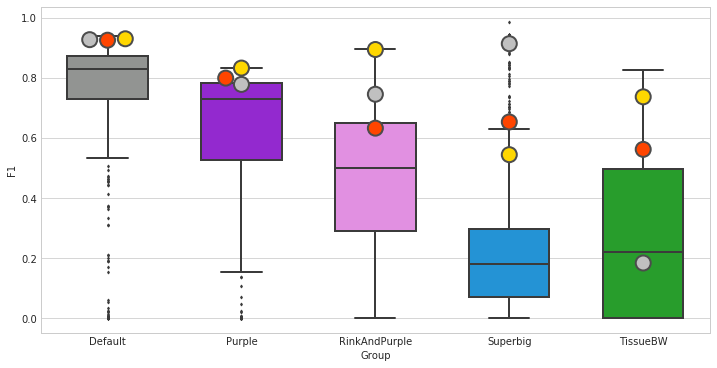

In [15]:
plt.figure(figsize=(12,6))
ax = sb.swarmplot(data=f1_x_group[f1_x_group.SubmissionID.isin(winners)], x="Group", y="F1", palette=["gold", "orangered", "silver"], size=15, linewidth=2, hue="SubmissionID")
ax.legend_.remove()
sb.boxplot(data=f1_x_group, x="Group", y="F1", palette=palette, linewidth=2, width=0.6, fliersize=2)

In [16]:
len(f1_x_group)/5

706.0

# Error counts

In [17]:
# Count total number of true objects
image_groups["Objects"] = 0
for i,r in image_groups.iterrows():
    im = skimage.io.imread("/storage/data/DSB2018/phase-2-gt/" + r.Image + ".png")
    image_groups.loc[i, "Objects"] = len(np.unique(im)) - 1
    
true_objects = image_groups.groupby("Group")["Objects"].sum()
true_objects.sum()

3717

In [18]:
cp_accuracy["team"] = "CellProfiler"
top_groups = pd.concat([accuracy, cp_accuracy])
top_groups = pd.merge(top_groups, image_groups, on="Image")

all_submissions = submissions.append({"filename":"cppipe", "id":"cellprofiler", "score":0.5, "team":"CellProfiler"}, ignore_index=True)

counts_x_group = top_groups[ top_groups["Threshold"].round(decimals=2) == THRESHOLD ].groupby(["SubmissionID", "Group"]).sum()[["TP", "FP", "FN"]].reset_index()
counts_x_group = pd.merge(counts_x_group, all_submissions, left_on="SubmissionID", right_on="id")
counts_x_group = counts_x_group[counts_x_group["SubmissionID"].isin(winners)]

counts_x_group["order"] = 0
counts_x_group.loc[counts_x_group.id == 7193229, "order"] = 1
counts_x_group.loc[counts_x_group.id == 7215993, "order"] = 2
counts_x_group.loc[counts_x_group.id == 7199273, "order"] = 3
counts_x_group.loc[counts_x_group.id == "cellprofiler", "order"] = 4

counts_x_group = counts_x_group.sort_values("order")

In [19]:
for k in counts_x_group.SubmissionID.unique():
    idx = counts_x_group.loc[counts_x_group.SubmissionID == k].index[0]
    dup = dict( counts_x_group.loc[idx] )
    dup["Group"] = "Total"
    
    dup["TP"] = counts_x_group[counts_x_group["SubmissionID"] == k].TP.sum()
    dup["FP"] = counts_x_group[counts_x_group["SubmissionID"] == k].FP.sum()
    dup["FN"] = counts_x_group[counts_x_group["SubmissionID"] == k].FN.sum()
    
    counts_x_group = counts_x_group.append(dup , ignore_index=True )
    
counts_x_group

,SubmissionID,Group,TP,FP,FN,filename,id,score,team,order
0,7193229,Default,1668,88,111,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
1,7193229,Purple,890,98,262,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
2,7193229,RinkAndPurple,548,33,94,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
3,7193229,Superbig,22,11,14,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
4,7193229,TissueBW,65,3,43,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
5,7215993,TissueBW,11,0,97,sub-scale3.csv,7215993,0.614730,jacobkie,2
6,7215993,Superbig,31,3,5,sub-scale3.csv,7215993,0.614730,jacobkie,2
7,7215993,RinkAndPurple,436,96,206,sub-scale3.csv,7215993,0.614730,jacobkie,2
8,7215993,Purple,800,105,352,sub-scale3.csv,7215993,0.614730,jacobkie,2
9,7215993,Default,1575,72,204,sub-scale3.csv,7215993,0.614730,jacobkie,2


In [20]:
# Normalize counts with respect to real objects

for k in counts_x_group["Group"].unique():
    if k == "Total":
        counts_x_group.loc[counts_x_group["Group"] == k, ["TP", "FP", "FN"]] /= true_objects.sum()
    else:
        counts_x_group.loc[counts_x_group["Group"] == k, ["TP", "FP", "FN"]] /= true_objects[k]
    
counts_x_group

,SubmissionID,Group,TP,FP,FN,filename,id,score,team,order
0,7193229,Default,0.937605,0.049466,0.062395,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
1,7193229,Purple,0.772569,0.085069,0.227431,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
2,7193229,RinkAndPurple,0.853583,0.051402,0.146417,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
3,7193229,Superbig,0.611111,0.305556,0.388889,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
4,7193229,TissueBW,0.601852,0.027778,0.398148,submission_1.csv,7193229,0.631646,[ods.ai] topcoders,1
5,7215993,TissueBW,0.101852,0.000000,0.898148,sub-scale3.csv,7215993,0.614730,jacobkie,2
6,7215993,Superbig,0.861111,0.083333,0.138889,sub-scale3.csv,7215993,0.614730,jacobkie,2
7,7215993,RinkAndPurple,0.679128,0.149533,0.320872,sub-scale3.csv,7215993,0.614730,jacobkie,2
8,7215993,Purple,0.694444,0.091146,0.305556,sub-scale3.csv,7215993,0.614730,jacobkie,2
9,7215993,Default,0.885329,0.040472,0.114671,sub-scale3.csv,7215993,0.614730,jacobkie,2


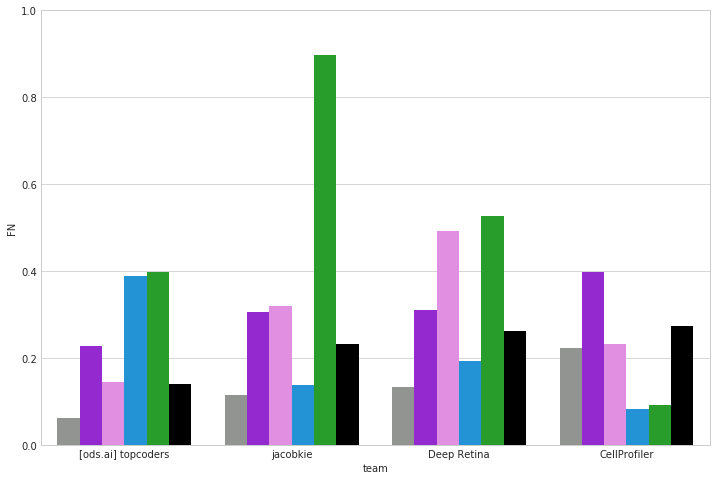

In [21]:
plt.figure(figsize=(12,8))
#sb.barplot(data=counts_x_group.groupby("team").sum().reset_index().sort_values("order"), x="team", y="FN", ci=None, alpha=0.3)
g = sb.barplot(data=counts_x_group, x="team", y="FN", ci=None, hue="Group", palette=palette)
g.set(ylim=(0, 1))
plt.legend("")

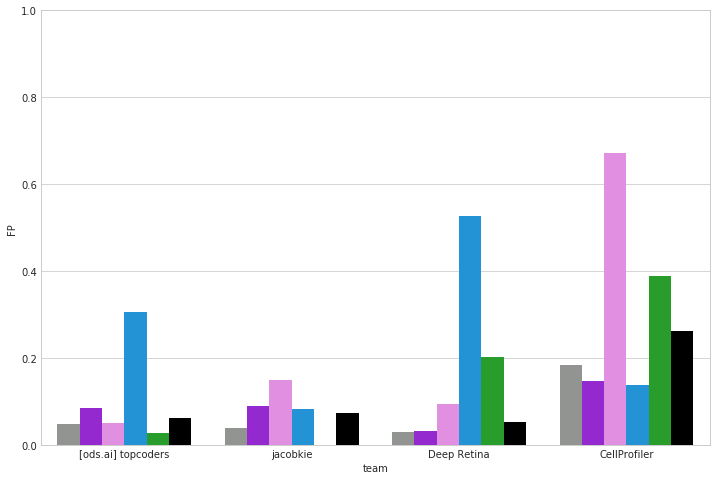

In [22]:
plt.figure(figsize=(12,8))
#sb.barplot(data=counts_x_group.groupby("team").sum().reset_index().sort_values("order"), x="team", y="FP", ci=None, alpha=0.3)
g = sb.barplot(data=counts_x_group, x="team", y="FP", ci=None, hue="Group", palette=palette)
g.set(ylim=(0, 1.0))
plt.legend("")

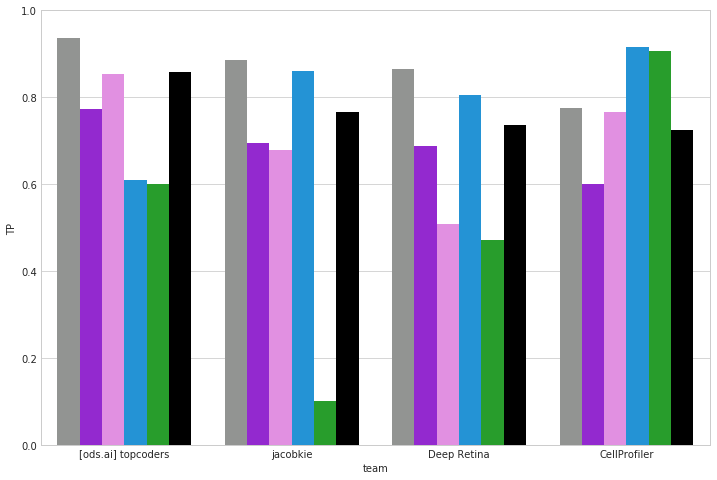

In [23]:
plt.figure(figsize=(12,8))
#sb.barplot(data=counts_x_group.groupby("team").sum().reset_index().sort_values("order"), x="team", y="FP", ci=None, alpha=0.3)
g = sb.barplot(data=counts_x_group, x="team", y="TP", ci=None, hue="Group", palette=palette)
g.set(ylim=(0, 1))
plt.legend("")